In [56]:
import pandas as pd
import numpy as np 
import seaborn as sns


In [57]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [58]:
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [59]:
for column in df.columns:
    print(df[column].value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547


In [60]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [61]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [62]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [63]:
df['location']=df['location'].fillna('Sarjapur Road')


In [64]:
df['size'].value_counts()
df['size']=df['size'].fillna('2 BHK')


In [65]:
df['bath']=df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [66]:
df['BHK']=df['size'].str.split().str.get(0).astype(int)
df['BHK']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: BHK, Length: 13320, dtype: int32

In [67]:
df[df.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [68]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [69]:
# Now we Need to Fix the Range Issues Here

def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [70]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [71]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [72]:
df.head()

#Make The Price to Per Square feet now Rather than Total Price

df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [73]:
df.head()
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [74]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [75]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_10 else x )
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

Checking and Removing The Outliers


In [76]:
df.describe()
(df['total_sqft']/df['BHK']).describe()

#There is A bedroom with 0.25 Square feet

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [77]:
# Removing the outliers
#we will keep all those values in which Bedroom has total sqaure foot greater than 300
df=df[(df['total_sqft']/df['BHK']>=300)]
df.describe()
df.shape

(12530, 7)

In [78]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [79]:
#Remove the outlier in price_per_sqft
def remove_outliers_sqft(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)

        st=np.std(subdf.price_per_sqft)

        gen_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,gen_df],ignore_index=True)
        return df_out
df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,7.000000,7.0,7.000000,7.000000,7.000000
mean,1998.571429,3.0,273.714286,3.285714,13186.920952
std,691.042174,1.0,126.757925,0.755929,1785.676416
min,1200.000000,2.0,130.000000,2.000000,10833.333333
25%,1432.500000,2.0,171.000000,3.000000,11942.823079
50%,1875.000000,3.0,235.000000,3.000000,12533.333333
75%,2600.000000,4.0,390.500000,4.000000,15017.862839
max,2850.000000,4.0,428.000000,4.000000,15020.408163


In [80]:
def bhk_outlier_remove(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5: 
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices,axis='index')

df=bhk_outlier_remove(df)
df['BHK'].describe()

count    7.000000
mean     3.285714
std      0.755929
min      2.000000
25%      3.000000
50%      3.000000
75%      4.000000
max      4.000000
Name: BHK, dtype: float64

In [81]:
df.drop(columns=['size','price_per_sqft'],inplace=True)
df.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


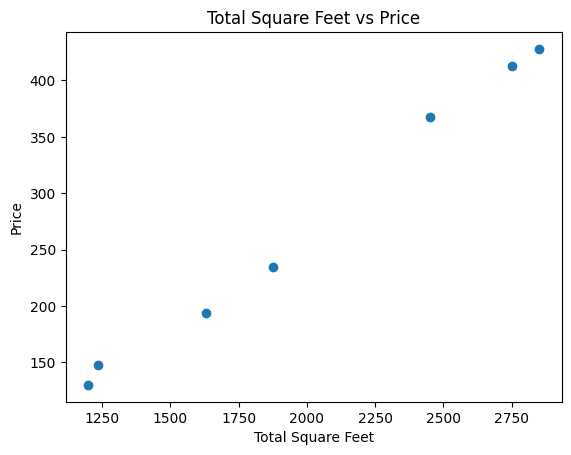

In [92]:
#The Visualizations
import matplotlib.pyplot as plt

# Plotting total_sqft vs price
plt.scatter(df['total_sqft'], df['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Total Square Feet vs Price')
plt.show()


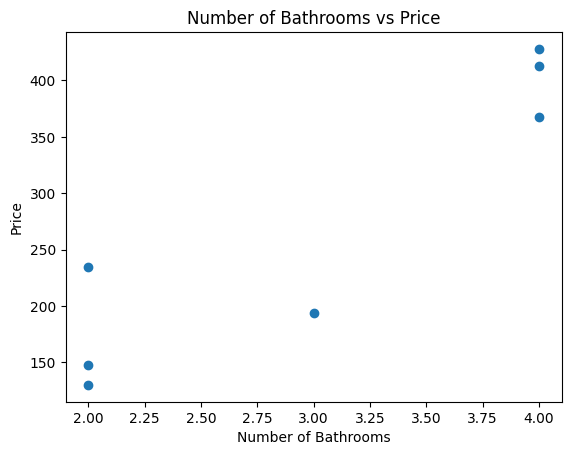

In [93]:
# Plotting bath vs price
plt.scatter(df['bath'], df['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price')
plt.show()

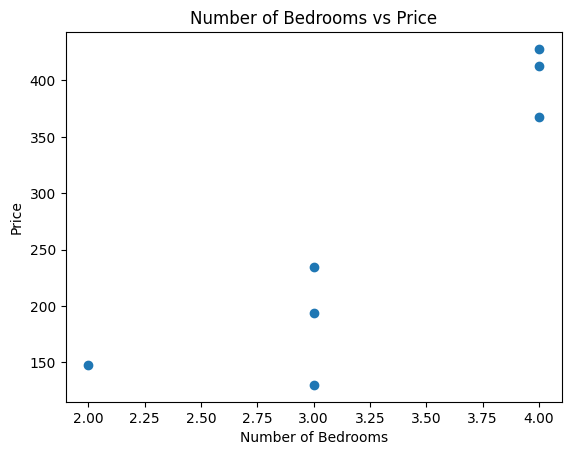

In [94]:
# Plotting BHK vs price
plt.scatter(df['BHK'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()

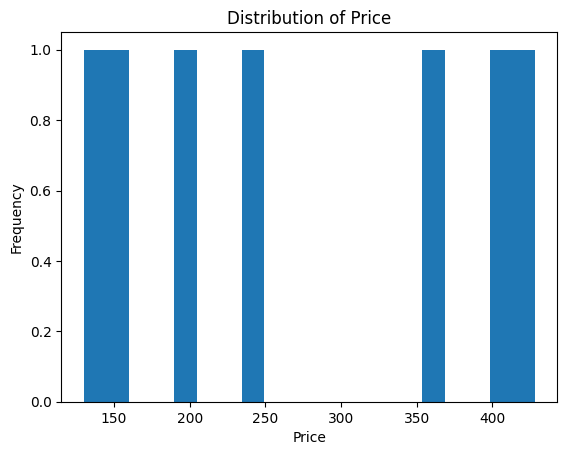

In [95]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

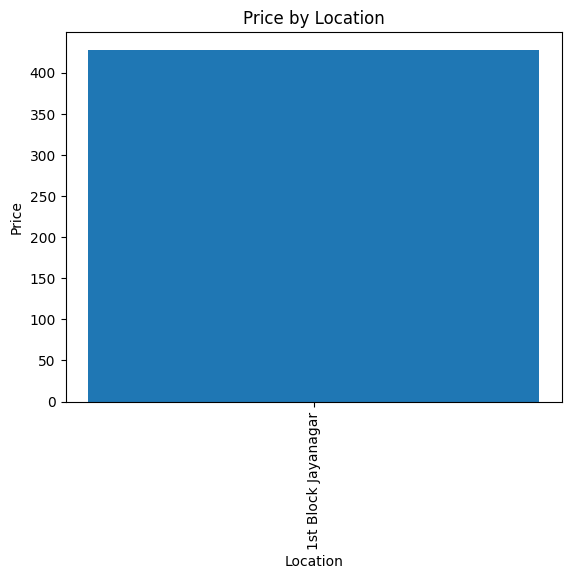

In [96]:
plt.bar(df['location'], df['price'])
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price by Location')
plt.xticks(rotation=90)
plt.show()

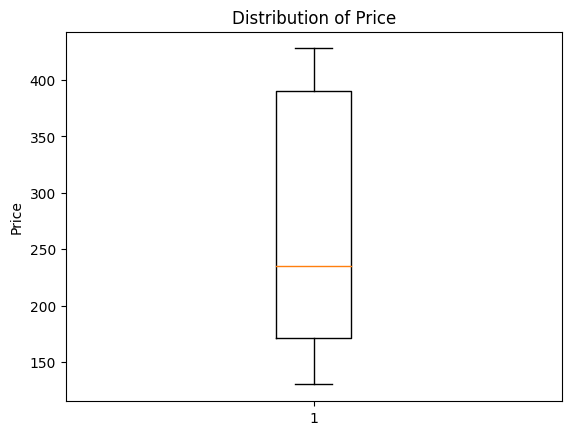

In [97]:
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Distribution of Price')
plt.show()


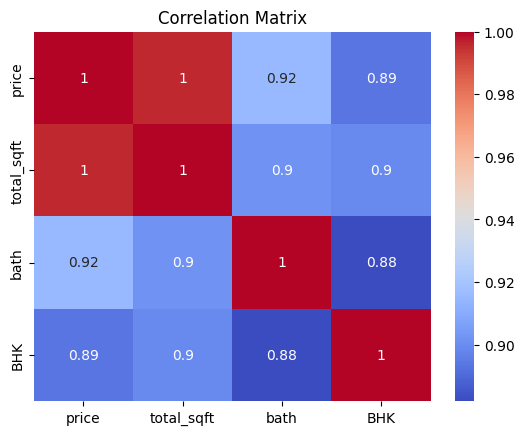

In [98]:
import seaborn as sns

correlation_matrix = df[['price', 'total_sqft', 'bath', 'BHK']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


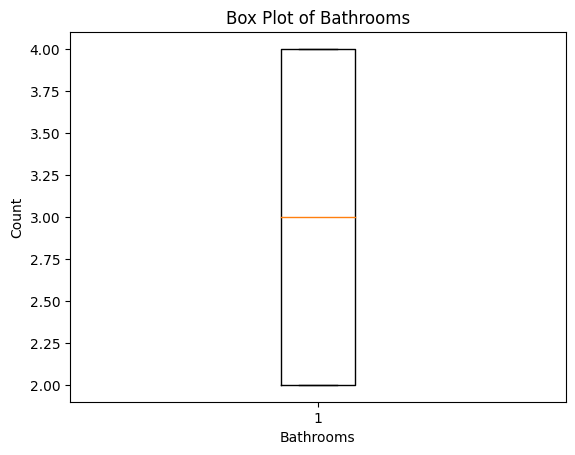

In [100]:
plt.boxplot(df['bath'])
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title('Box Plot of Bathrooms')
plt.show()


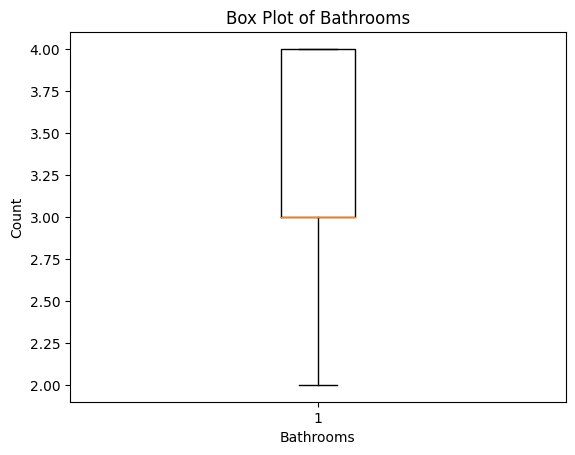

In [101]:
plt.boxplot(df['BHK'])
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title('Box Plot of Bathrooms')
plt.show()


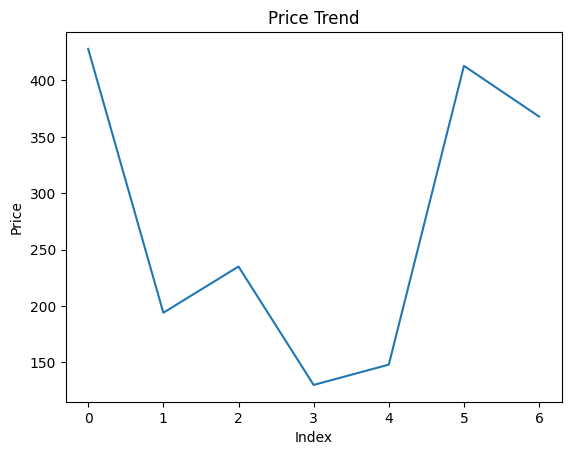

In [102]:

# Plotting a line chart for price
plt.plot(df['price'])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Trend')
plt.show()

#The Trend shows that price flactuates too Much

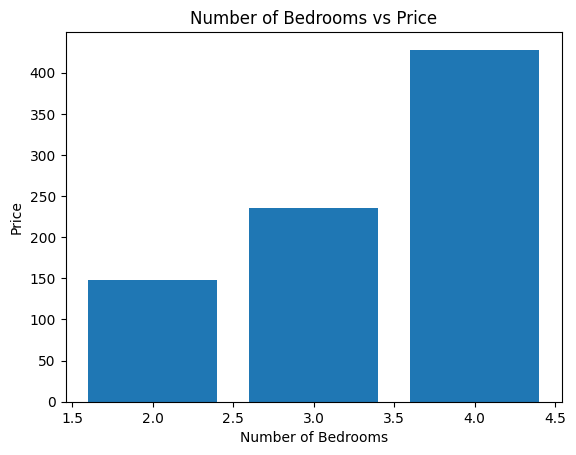

In [103]:
import matplotlib.pyplot as plt

# Plotting a bar chart for BHK
plt.bar(df['BHK'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')
plt.show()

#The Higher the Number of bedrooms the more the price

In [82]:
#save the Cleaned Data
df.to_csv('cleanHousedata.csv')
x=df.drop(columns=['price'])
y=df['price']


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [84]:
#Now we do train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(5, 4)
(2, 4)


Apply Linear Regression

In [85]:
colum_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [86]:
scaler=StandardScaler()
lr=LinearRegression(normalize=True)
pipe=make_pipeline(colum_trans,scaler,lr)

In [88]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

c:\Users\saqib\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.9653208632965977

Applying Lasso Model

In [89]:
lasso=Lasso()
pipe=make_pipeline(colum_trans,scaler,lasso)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9676715205314826

Applying Ridge Model

In [90]:
ridge=Ridge()
pipe=make_pipeline(colum_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9110540230681752

In [91]:
import pickle
pickle.dump(pipe,open('lassoModel.pkl','wb'))